In [1]:
! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import PIL
import warnings
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from PIL import Image
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model, layers
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/training_details_zoomed.csv')


data


,path,label,crop
0,/content/drive/MyDrive/cotton_zoomed/aug-DJI_0...,1,cotton
1,/content/drive/MyDrive/cotton_zoomed/aug-DJI_0...,1,cotton
2,/content/drive/MyDrive/cotton_zoomed/aug-DJI_0...,1,cotton
3,/content/drive/MyDrive/cotton_zoomed/aug-DJI_0...,1,cotton
4,/content/drive/MyDrive/cotton_zoomed/aug-DJI_0...,1,cotton
...,...,...,...
1495,/content/drive/MyDrive/redGram_zoomed/aug4-DJI...,0,red gram
1496,/content/drive/MyDrive/redGram_zoomed/aug4-DJI...,0,red gram
1497,/content/drive/MyDrive/redGram_zoomed/aug4-DJI...,0,red gram
1498,/content/drive/MyDrive/redGram_zoomed/aug4-DJI...,0,red gram


In [5]:
# Define the features (X) and the target variable (y)
X = data.drop(columns=['label'])  # Adjust 'target_column_name' to the name of your target variable
y = data['label']  # Adjust 'target_column_name' to the name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,path,crop
382,/content/drive/MyDrive/cotton_zoomed/DJI_0643.JPG,cotton
538,/content/drive/MyDrive/maize_zoomed/DJI_0118.JPG,maize
1493,/content/drive/MyDrive/redGram_zoomed/aug4-DJI...,red gram
1112,/content/drive/MyDrive/redGram_zoomed/DJI_0237...,red gram
324,/content/drive/MyDrive/cotton_zoomed/DJI_0587.JPG,cotton
...,...,...
1130,/content/drive/MyDrive/redGram_zoomed/aug-DJI_...,red gram
1294,/content/drive/MyDrive/redGram_zoomed/aug2-DJI...,red gram
860,/content/drive/MyDrive/maize_zoomed/DJI_0807.JPG,maize
1459,/content/drive/MyDrive/redGram_zoomed/aug4-DJI...,red gram


In [7]:
X_test

,path,crop
1116,/content/drive/MyDrive/redGram_zoomed/DJI_0217...,red gram
1368,/content/drive/MyDrive/redGram_zoomed/aug3-DJI...,red gram
422,/content/drive/MyDrive/cotton_zoomed/DJI_0690.JPG,cotton
413,/content/drive/MyDrive/cotton_zoomed/DJI_0684.JPG,cotton
451,/content/drive/MyDrive/cotton_zoomed/DJI_0716.JPG,cotton
...,...,...
983,/content/drive/MyDrive/maize_zoomed/aug-DJI_09...,maize
799,/content/drive/MyDrive/maize_zoomed/DJI_0855.JPG,maize
1265,/content/drive/MyDrive/redGram_zoomed/aug2-DJI...,red gram
1150,/content/drive/MyDrive/redGram_zoomed/aug-DJI_...,red gram


In [8]:
def path_to_RGB(path :str):
   path=path.replace('/input','/input/agriculture-crop-images/crop_images')
   img = Image.open(path)
   img = img.resize((28, 28))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(28,28,3)
   return img_arr

def path_to_RGB_test(path :str):
   img = Image.open(path)
   img = img.resize((28, 28))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(28,28,3)
   return img_arr

In [9]:
X_train['path']=X_train['path'].apply(path_to_RGB)
X_test['path']=X_test['path'].apply(path_to_RGB_test)
X_train['path']=X_train['path']/255
X_test['path']=X_test['path']/255

In [10]:
type(X_train)

pandas.core.frame.DataFrame

In [11]:
csv_file_path = '/content/drive/MyDrive/x_train_zoomed.csv'
X_train.to_csv(csv_file_path, index=False)


In [12]:
no_of_training= X_train['path'].shape[0]

In [13]:
X=[]
for x in X_train['path']:
    for j in x:
        for i in j:
            for a in i :
                X.append(a)

In [14]:
X=np.asarray(X).reshape(no_of_training,28,28,3)
Y=y_train
Y=to_categorical(Y,num_classes=3)

In [15]:
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu', input_shape = (28,28,3)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
#                  activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation = "softmax"))

#modified ver 1
# from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from keras.models import Model

# # Define input layer
# input_layer = Input(shape=(28, 28, 3))

# # First convolutional layer
# conv1 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(input_layer)

# # Second convolutional layer
# conv2 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(conv1)

# # Max-pooling layer
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)

# # Dropout layer
# dropout1 = Dropout(0.25)(pool1)

# # Third convolutional layer
# conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu')(dropout1)

# # Fourth convolutional layer
# conv4 = Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu')(conv3)

# # Max-pooling layer
# pool2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)

# # Dropout layer
# dropout2 = Dropout(0.25)(pool2)

# # Flatten layer
# flatten = Flatten()(dropout2)

# # First fully connected layer
# fc1 = Dense(256, activation='relu')(flatten)

# # Dropout layer
# dropout3 = Dropout(0.5)(fc1)

# # Second fully connected layer
# output_layer = Dense(5, activation='softmax')(dropout3)

# # Create the model
# model = Model(inputs=input_layer, outputs=output_layer)

#2
# from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
# from keras.models import Model

# # Define input layer
# input_layer = Input(shape=(28, 28, 3))

# # First convolutional layer
# conv1_1 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(input_layer)
# conv1_2 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(conv1_1)

# # Second convolutional layer
# conv2_1 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(input_layer)
# conv2_2 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(conv2_1)

# # Max-pooling layer
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)

# # Dropout layer
# dropout1 = Dropout(0.25)(pool1)
# dropout2 = Dropout(0.25)(pool2)

# # Third convolutional layer
# conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu')(dropout1)

# # Fourth convolutional layer
# conv4 = Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu')(dropout2)

# # Max-pooling layer
# pool3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)
# pool4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)

# # Dropout layer
# dropout3 = Dropout(0.25)(pool3)
# dropout4 = Dropout(0.25)(pool4)

# # Concatenate feature maps from preceding layers
# concatenated_features = concatenate([dropout3, dropout4])

# # Flatten layer
# flatten = Flatten()(concatenated_features)

# # First fully connected layer
# fc1 = Dense(256, activation='relu')(flatten)

# # Dropout layer
# dropout5 = Dropout(0.5)(fc1)

# # Second fully connected layer
# output_layer = Dense(5, activation='softmax')(dropout5)

# # Create the model
# model = Model(inputs=input_layer, outputs=output_layer)

#3
# from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
# from keras.models import Model

# # Define input layer
# input_layer = Input(shape=(28, 28, 3))

# # First convolutional layer
# conv1_1 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(input_layer)
# conv1_2 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(conv1_1)

# # Second convolutional layer
# conv2_1 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(input_layer)
# conv2_2 = Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu')(conv2_1)

# # Max-pooling layer
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)

# # Dropout layer
# dropout1 = Dropout(0.25)(pool1)
# dropout2 = Dropout(0.25)(pool2)

# # Third convolutional layer
# conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu')(dropout1)

# # Fourth convolutional layer
# conv4 = Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu')(dropout2)

# # Max-pooling layer
# pool3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)
# pool4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)

# # Dropout layer
# dropout3 = Dropout(0.25)(pool3)
# dropout4 = Dropout(0.25)(pool4)

# # Concatenate feature maps from preceding layers
# concatenated_features = concatenate([dropout3, dropout4])

# # Transition block
# conv_transition = Conv2D(filters=32, kernel_size=(1, 1), activation='relu')(concatenated_features)
# pool_transition = MaxPooling2D(pool_size=(2, 2))(conv_transition)

# # Flatten layer
# flatten = Flatten()(pool_transition)

# # First fully connected layer
# fc1 = Dense(256, activation='relu')(flatten)

# # Dropout layer
# dropout5 = Dropout(0.5)(fc1)

# # Second fully connected layer
# output_layer = Dense(5, activation='softmax')(dropout5)

# # Create the model
# model = Model(inputs=input_layer, outputs=output_layer)

from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate, BatchNormalization, Activation
from keras.models import Model

# Define input layer
input_layer = Input(shape=(28, 28, 3))

# Function for composite operation (BN + Conv)
def composite_function(input_features, filters, kernel_size):
    # Batch normalization
    x = BatchNormalization()(input_features)
    # ReLU activation
    x = Activation('relu')(x)
    # Convolution
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='Same', activation='relu')(x)
    return x

# First convolutional layer
conv1_1 = composite_function(input_layer, filters=32, kernel_size=(5, 5))
conv1_2 = composite_function(conv1_1, filters=32, kernel_size=(5, 5))

# Second convolutional layer
conv2_1 = composite_function(input_layer, filters=32, kernel_size=(5, 5))
conv2_2 = composite_function(conv2_1, filters=32, kernel_size=(5, 5))

# Max-pooling layer
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2_2)

# Dropout layer
dropout1 = Dropout(0.25)(pool1)
dropout2 = Dropout(0.25)(pool2)

# Third convolutional layer
conv3 = composite_function(dropout1, filters=64, kernel_size=(3, 3))

# Fourth convolutional layer
conv4 = composite_function(dropout2, filters=64, kernel_size=(3, 3))

# Max-pooling layer
pool3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)
pool4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)

# Dropout layer
dropout3 = Dropout(0.25)(pool3)
dropout4 = Dropout(0.25)(pool4)

# Concatenate feature maps from preceding layers
concatenated_features = concatenate([dropout3, dropout4])

# Transition block
conv_transition = composite_function(concatenated_features, filters=32, kernel_size=(1, 1))
pool_transition = MaxPooling2D(pool_size=(2, 2))(conv_transition)

# Flatten layer
flatten = Flatten()(pool_transition)

# First fully connected layer
fc1 = Dense(256, activation='relu')(flatten)

# Dropout layer
dropout5 = Dropout(0.5)(fc1)

# Second fully connected layer
output_layer = Dense(3, activation='softmax')(dropout5)

# Create the model
model_relu = Model(inputs=input_layer, outputs=output_layer)



In [16]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model_relu.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
#New sl-relu

from keras.layers import Input, Conv2D, Flatten, Dense, concatenate, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model
import tensorflow as tf
import math

# input layer
input_layer = Input(shape=(28, 28, 3))

import keras.backend as K

def sl_relu(x):
    # Define the threshold
    threshold = 0.05

    # Apply the custom activation function element-wise using TensorFlow operations
    condition = tf.math.less(x, 0)
    abs_x = tf.abs(x)
    log_term = tf.math.log(threshold * x + 1) + tf.abs(tf.math.log(threshold * abs_x + 1) - abs_x)

    return tf.where(condition, x / (1 + abs_x), tf.where(tf.math.less_equal(x, 1), x, log_term))



# First convolutional layer
x1 = Conv2D(32, (3, 3), padding='same')(Conv2D(32, (3, 3), padding='same')(input_layer))
x1 = BatchNormalization()(x1)
x1 = Activation(sl_relu)(x1)

# # SL - ReLU activation function
# def sl_relu(x) :
#   # Convolutional layer's output
#   conv_output = x

#   # Convolutional layer's kernel
#   conv_layer = x.op.inputs[0]
#   kernel = conv_layer.kernel

#   if x < 0 :
#     return x/ 1 + abs(x)
#   else :
#     if x <= kernel :
#       return x
#     else :
#       return math.log(0.05*x + 1) + abs(math.log(0.05*kernel + 1) - kernel)


# Second convolutional layer
concatenated_features_for_l2 = concatenate([x1, input_layer])
x2 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.Activation(sl_relu)(x2)

# Third convolutional layer
concatenated_features_for_l3 = concatenate([x2, x1, input_layer])
x3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Activation(sl_relu)(x3)

# Conversion Block
x4 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x3)
x4 = tf.keras.layers.Activation(sl_relu)(x4)

# Max-pooling layer
pool4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Dense block 2
# First convolutional layer
x5 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(pool4)
x5 = tf.keras.layers.BatchNormalization()(x5)
x5 = tf.keras.layers.Activation(sl_relu)(x5)

# Second convolutional layer
concatenated_features_for_l6 = concatenate([x5, pool4])
x6 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l6)
x6 = tf.keras.layers.BatchNormalization()(x6)
x6 = tf.keras.layers.Activation(sl_relu)(x6)

# Third convolutional layer
concatenated_features_for_l7 = concatenate([x5, x6, pool4])
x7 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l7)
x7 = tf.keras.layers.BatchNormalization()(x7)
x7 = tf.keras.layers.Activation(sl_relu)(x7)

concatenated_features_for_AF = concatenate([x5,x6,x7, pool4])

# Passing it through activation function
final_af_val = sl_relu(concatenated_features_for_AF)
# Flatten layer
flatten = Flatten()(final_af_val)


output_layer = Dense(3, activation='softmax')(flatten)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)


In [18]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
no_of_test = X_test.shape[0]

In [20]:
X_test

,path,crop
1116,"[[[0.7294117647058823, 0.615686274509804, 0.49...",red gram
1368,"[[[0.6627450980392157, 0.5490196078431373, 0.4...",red gram
422,"[[[0.18823529411764706, 0.18823529411764706, 0...",cotton
413,"[[[0.5333333333333333, 0.48627450980392156, 0....",cotton
451,"[[[0.18823529411764706, 0.25098039215686274, 0...",cotton
...,...,...
983,"[[[0.5215686274509804, 0.596078431372549, 0.35...",maize
799,"[[[0.3607843137254902, 0.4235294117647059, 0.2...",maize
1265,"[[[0.5098039215686274, 0.403921568627451, 0.30...",red gram
1150,"[[[0.4470588235294118, 0.44313725490196076, 0....",red gram


In [21]:
csv_file_path = '/content/drive/MyDrive/x_test_zoomed.csv'
X_test.to_csv(csv_file_path, index=False)

In [22]:
#similar as done for the training data
X_t=[]
for x in X_test['path']:
    for j in x:
        for i in j:
            for a in i :
                X_t.append(a)

In [23]:
X_t=np.asarray(X_t).reshape(no_of_test,28,28,3)

In [24]:
Y_test=to_categorical(y_test,num_classes=3)
print(Y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [25]:
np.save('/content/drive/MyDrive/x_train_array_zoomed.csv', X)
np.save('/content/drive/MyDrive/x_test_array_zoomed.csv', X_t)
#How to load
# loaded_array = np.load('file_name.npy')



In [26]:
print(Y[0].shape)

(3,)


In [27]:
X.shape

(1200, 28, 28, 3)

Epoch 1/100
38/38 [==============================] - 17s 46ms/step - loss: 2.0285 - accuracy: 0.8250 - val_loss: 7.4157 - val_accuracy: 0.3500
Epoch 2/100
38/38 [==============================] - 1s 21ms/step - loss: 0.8325 - accuracy: 0.9008 - val_loss: 9.1088 - val_accuracy: 0.5467
Epoch 3/100
38/38 [==============================] - 1s 20ms/step - loss: 0.5062 - accuracy: 0.9225 - val_loss: 7.3934 - val_accuracy: 0.3033
Epoch 4/100
38/38 [==============================] - 1s 20ms/step - loss: 0.7445 - accuracy: 0.9225 - val_loss: 16.1311 - val_accuracy: 0.2867
Epoch 5/100
38/38 [==============================] - 1s 22ms/step - loss: 0.1952 - accuracy: 0.9692 - val_loss: 2.0191 - val_accuracy: 0.6800
Epoch 6/100
38/38 [==============================] - 1s 20ms/step - loss: 0.3051 - accuracy: 0.9542 - val_loss: 4.1121 - val_accuracy: 0.5267
Epoch 7/100
38/38 [==============================] - 1s 22ms/step - loss: 0.2173 - accuracy: 0.9633 - val_loss: 8.3129 - val_accuracy: 0.3833
Epoc

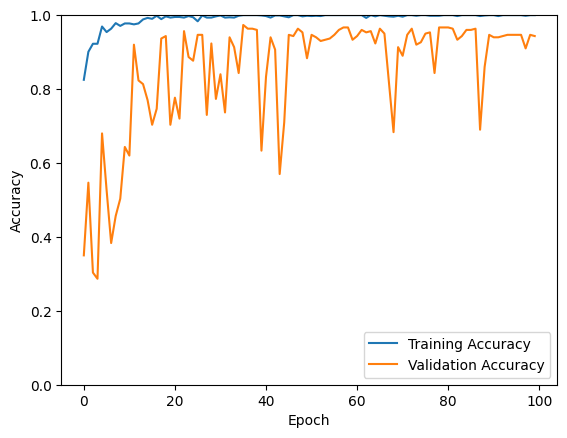

In [28]:

history = model.fit(X, Y, epochs=100, validation_data=(X_t, Y_test))

# Plot the accuracy vs. epoch graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Epoch 1/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0028 - accuracy: 0.9983 - val_loss: 0.4444 - val_accuracy: 0.9133
Epoch 2/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0458 - accuracy: 0.9958 - val_loss: 0.9814 - val_accuracy: 0.7633
Epoch 3/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.3157 - val_accuracy: 0.9300
Epoch 4/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0335 - accuracy: 0.9933 - val_loss: 0.3837 - val_accuracy: 0.9567
Epoch 5/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0189 - accuracy: 0.9975 - val_loss: 0.1679 - val_accuracy: 0.9700
Epoch 6/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0150 - accuracy: 0.9942 - val_loss: 0.2498 - val_accuracy: 0.9800
Epoch 7/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0163 - accuracy: 0.9942 - val_loss: 0.2980 - val_accuracy: 0.9633
Epoch 

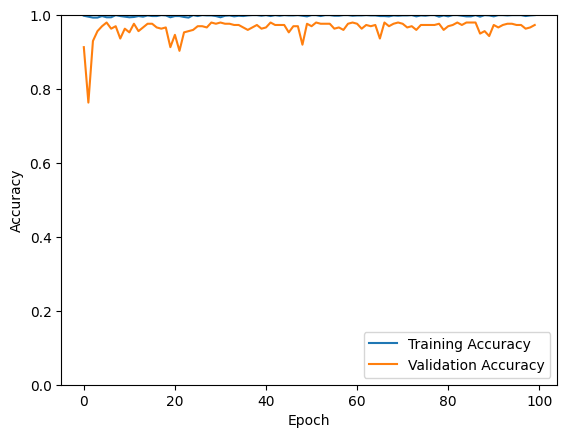

In [32]:
history = model_relu.fit(X, Y, epochs=100, validation_data=(X_t, Y_test))

# Plot the accuracy vs. epoch graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [33]:
count = 0

#print(len(X_t))
for row_idx, (row, r1) in enumerate(zip(model.predict(X_t),Y_test)):
    # Find the index of the maximum value in the row
    max_col_idx = np.argmax(row)
    max_colu_idx = np.argmax(r1)
    if max_col_idx == max_colu_idx:
      count+=1
      result = str(max_col_idx) + " -> " +  str( max_colu_idx)
      print(result)
    else:
       result = str(max_col_idx) + " -> " +  str( max_colu_idx)
       print(result)
print (count/300 * 100)





10/10 [==============================] - 1s 9ms/step
0 -> 0
0 -> 0
1 -> 1
1 -> 1
1 -> 1
2 -> 2
0 -> 0
2 -> 2
0 -> 0
2 -> 1
2 -> 2
0 -> 0
2 -> 2
0 -> 0
1 -> 1
0 -> 0
0 -> 0
2 -> 2
1 -> 1
1 -> 1
0 -> 0
0 -> 0
1 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
2 -> 2
0 -> 0
0 -> 0
1 -> 1
1 -> 1
1 -> 1
1 -> 1
0 -> 0
1 -> 1
0 -> 0
1 -> 1
1 -> 0
2 -> 2
0 -> 0
1 -> 1
1 -> 1
1 -> 1
2 -> 2
2 -> 2
2 -> 2
2 -> 2
0 -> 0
0 -> 0
2 -> 2
2 -> 2
1 -> 1
1 -> 1
1 -> 1
2 -> 2
2 -> 2
2 -> 2
1 -> 1
1 -> 1
2 -> 2
1 -> 1
1 -> 1
0 -> 0
0 -> 0
1 -> 1
1 -> 1
2 -> 2
2 -> 2
1 -> 1
2 -> 2
0 -> 0
2 -> 2
2 -> 2
1 -> 1
2 -> 2
0 -> 0
1 -> 1
1 -> 1
2 -> 2
2 -> 2
1 -> 1
2 -> 2
2 -> 2
2 -> 2
2 -> 2
0 -> 0
1 -> 1
1 -> 1
0 -> 0
0 -> 0
1 -> 1
1 -> 1
1 -> 1
0 -> 0
1 -> 1
2 -> 2
2 -> 2
0 -> 0
0 -> 0
0 -> 1
1 -> 1
1 -> 1
0 -> 0
1 -> 1
2 -> 2
1 -> 1
0 -> 0
2 -> 2
1 -> 1
1 -> 1
1 -> 1
2 -> 2
1 -> 1
1 -> 1
0 -> 0
2 -> 2
0 -> 0
0 -> 0
1 -> 1
1 -> 1
2 -> 0
0 -> 0
2 -> 2
0 -> 0
1 -> 1
0 -> 0
1 -> 1
0 -> 0
0 -> 0
2 -> 2
1 

## Adding the Dropout layer

In [34]:
#New sl-relu

from keras.layers import Input, Conv2D, Flatten, Dense, concatenate, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model
import tensorflow as tf
import math

# input layer
input_layer = Input(shape=(28, 28, 3))

import keras.backend as K

def sl_relu(x):
    # Define the threshold
    threshold = 0.05

    # Apply the custom activation function element-wise using TensorFlow operations
    condition = tf.math.less(x, 0)
    abs_x = tf.abs(x)
    log_term = tf.math.log(threshold * x + 1) + tf.abs(tf.math.log(threshold * abs_x + 1) - abs_x)

    return tf.where(condition, x / (1 + abs_x), tf.where(tf.math.less_equal(x, 1), x, log_term))



# First convolutional layer
x1 = Conv2D(32, (3, 3), padding='same')(Conv2D(32, (3, 3), padding='same')(input_layer))
x1 = BatchNormalization()(x1)
x1 = Activation(sl_relu)(x1)

# # SL - ReLU activation function
# def sl_relu(x) :
#   # Convolutional layer's output
#   conv_output = x

#   # Convolutional layer's kernel
#   conv_layer = x.op.inputs[0]
#   kernel = conv_layer.kernel

#   if x < 0 :
#     return x/ 1 + abs(x)
#   else :
#     if x <= kernel :
#       return x
#     else :
#       return math.log(0.05*x + 1) + abs(math.log(0.05*kernel + 1) - kernel)


# Second convolutional layer
concatenated_features_for_l2 = concatenate([x1, input_layer])
x2 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.Activation(sl_relu)(x2)

# Third convolutional layer
concatenated_features_for_l3 = concatenate([x2, x1, input_layer])
x3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Activation(sl_relu)(x3)

# Conversion Block
x4 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x3)
x4 = tf.keras.layers.Activation(sl_relu)(x4)

# Max-pooling layer
pool4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)
# Dropout layer
dropout1 = Dropout(0.25)(pool4)


# Dense block 2
# First convolutional layer
x5 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(dropout1)
x5 = tf.keras.layers.BatchNormalization()(x5)
x5 = tf.keras.layers.Activation(sl_relu)(x5)

# Second convolutional layer
concatenated_features_for_l6 = concatenate([x5, dropout1])
x6 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l6)
x6 = tf.keras.layers.BatchNormalization()(x6)
x6 = tf.keras.layers.Activation(sl_relu)(x6)

# Third convolutional layer
concatenated_features_for_l7 = concatenate([x5, x6, dropout1])
x7 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l7)
x7 = tf.keras.layers.BatchNormalization()(x7)
x7 = tf.keras.layers.Activation(sl_relu)(x7)

concatenated_features_for_AF = concatenate([x5,x6,x7, dropout1])

# Passing it through activation function
final_af_val = sl_relu(concatenated_features_for_AF)
# Flatten layer
flatten = Flatten()(final_af_val)


output_layer = Dense(3, activation='softmax')(flatten)

# Create the model
model_dropout = Model(inputs=input_layer, outputs=output_layer)


In [35]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model_dropout.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Epoch 1/100
38/38 [==============================] - 57s 45ms/step - loss: 1.5435 - accuracy: 0.8300 - val_loss: 2.0372 - val_accuracy: 0.6033
Epoch 2/100
38/38 [==============================] - 1s 26ms/step - loss: 0.5473 - accuracy: 0.9183 - val_loss: 3.9199 - val_accuracy: 0.5433
Epoch 3/100
38/38 [==============================] - 1s 26ms/step - loss: 0.8213 - accuracy: 0.9100 - val_loss: 15.5330 - val_accuracy: 0.2900
Epoch 4/100
38/38 [==============================] - 1s 24ms/step - loss: 0.2752 - accuracy: 0.9642 - val_loss: 7.9773 - val_accuracy: 0.5100
Epoch 5/100
38/38 [==============================] - 1s 27ms/step - loss: 0.3144 - accuracy: 0.9525 - val_loss: 8.5143 - val_accuracy: 0.3833
Epoch 6/100
38/38 [==============================] - 1s 21ms/step - loss: 0.2864 - accuracy: 0.9575 - val_loss: 15.3208 - val_accuracy: 0.2900
Epoch 7/100
38/38 [==============================] - 1s 21ms/step - loss: 0.1604 - accuracy: 0.9700 - val_loss: 13.7960 - val_accuracy: 0.2967
Ep

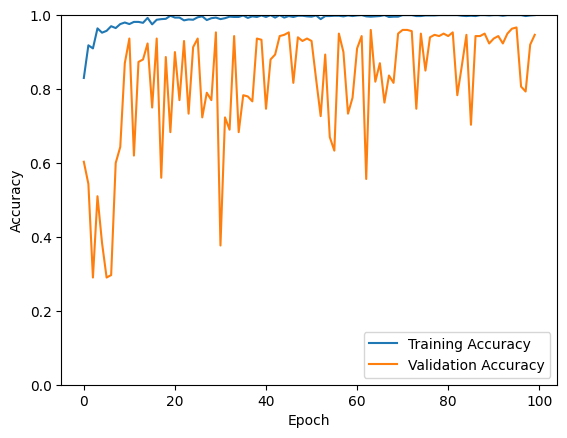

In [36]:
history = model_dropout.fit(X, Y, epochs=100, validation_data=(X_t, Y_test))

# Plot the accuracy vs. epoch graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Leaky ReLU AF

In [37]:

from keras.layers import Input, Conv2D, Flatten, Dense, concatenate, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model
import tensorflow as tf
import math

# input layer
input_layer = Input(shape=(28, 28, 3))

import keras.backend as K



# First convolutional layer
x1 = Conv2D(32, (3, 3), padding='same')(Conv2D(32, (3, 3), padding='same')(input_layer))
x1 = BatchNormalization()(x1)
x1 = LeakyReLU(alpha=0.3)(x1)

# # SL - ReLU activation function
# def sl_relu(x) :
#   # Convolutional layer's output
#   conv_output = x

#   # Convolutional layer's kernel
#   conv_layer = x.op.inputs[0]
#   kernel = conv_layer.kernel

#   if x < 0 :
#     return x/ 1 + abs(x)
#   else :
#     if x <= kernel :
#       return x
#     else :
#       return math.log(0.05*x + 1) + abs(math.log(0.05*kernel + 1) - kernel)


# Second convolutional layer
concatenated_features_for_l2 = concatenate([x1, input_layer])
x2 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = LeakyReLU(alpha=0.3)(x2)

# Third convolutional layer
concatenated_features_for_l3 = concatenate([x2, x1, input_layer])
x3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = LeakyReLU(alpha=0.3)(x3)

# Conversion Block
x4 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x3)
x4 = LeakyReLU(alpha=0.3)(x4)

# Max-pooling layer
pool4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Dense block 2
# First convolutional layer
x5 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(pool4)
x5 = tf.keras.layers.BatchNormalization()(x5)
x5 = LeakyReLU(alpha=0.3)(x5)

# Second convolutional layer
concatenated_features_for_l6 = concatenate([x5, pool4])
x6 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l6)
x6 = tf.keras.layers.BatchNormalization()(x6)
x6 = LeakyReLU(alpha=0.3)(x6)

# Third convolutional layer
concatenated_features_for_l7 = concatenate([x5, x6, pool4])
x7 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(concatenated_features_for_l7)
x7 = tf.keras.layers.BatchNormalization()(x7)
x7 = LeakyReLU(alpha=0.3)(x7)

concatenated_features_for_AF = concatenate([x5,x6,x7, pool4])

# Passing it through activation function
final_af_val = LeakyReLU(alpha=0.3)(concatenated_features_for_AF)
# Flatten layer
flatten = Flatten()(final_af_val)


output_layer = Dense(3, activation='softmax')(flatten)

# Create the model
model_leakyReLU = Model(inputs=input_layer, outputs=output_layer)


In [38]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model_leakyReLU.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Epoch 1/100
38/38 [==============================] - 1s 18ms/step - loss: 0.2292 - accuracy: 0.9325 - val_loss: 3.2226 - val_accuracy: 0.5833
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.6432 - accuracy: 0.9275 - val_loss: 4.2479 - val_accuracy: 0.2900
Epoch 3/100
38/38 [==============================] - 1s 21ms/step - loss: 0.1673 - accuracy: 0.9575 - val_loss: 3.1592 - val_accuracy: 0.3000
Epoch 4/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0980 - accuracy: 0.9708 - val_loss: 3.1979 - val_accuracy: 0.3100
Epoch 5/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0982 - accuracy: 0.9708 - val_loss: 8.0455 - val_accuracy: 0.2967
Epoch 6/100
38/38 [==============================] - 2s 47ms/step - loss: 0.1848 - accuracy: 0.9775 - val_loss: 8.6833 - val_accuracy: 0.2867
Epoch 7/100
38/38 [==============================] - 1s 32ms/step - loss: 0.1507 - accuracy: 0.9733 - val_loss: 3.2856 - val_accuracy: 0.6200
Epoch 

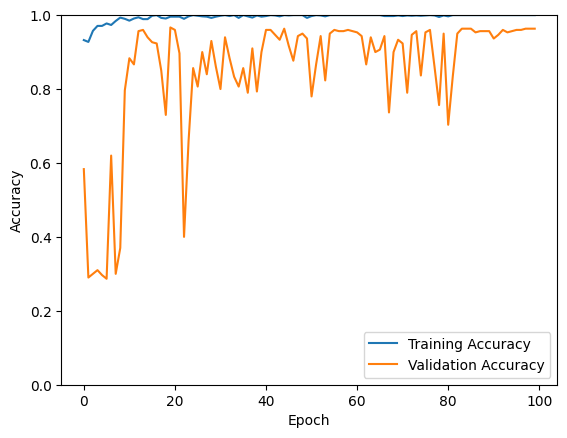

In [40]:
history = model_leakyReLU.fit(X, Y, epochs=100, validation_data=(X_t, Y_test))

# Plot the accuracy vs. epoch graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Preparing the dataset 150 x 150

In [41]:
def path_to_RGB_other(path :str):
   path=path.replace('/input','/input/agriculture-crop-images/crop_images')
   img = Image.open(path)
   img = img.resize((150, 150))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(150,150,3)
   print(img_arr.shape)
   return img_arr

def path_to_RGB_test_other(path :str):
   img = Image.open(path)
   img = img.resize((150, 150))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(150,150,3)
   return img_arr

In [42]:
X_train_other, X_test_other, y_train_other, y_test_other = train_test_split(data.drop(columns=['label']), data['label'] , test_size=0.2, random_state=42)

In [43]:
X_train_other['path']=X_train_other['path'].apply(path_to_RGB_other)
X_test_other['path']=X_test_other['path'].apply(path_to_RGB_test_other)
X_train_other['path']=X_train_other['path']/255
X_test_other['path']=X_test_other['path']/255

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 

In [ ]:
csv_file_path = '/content/drive/MyDrive/x_train_other_resnet.csv'
X_train_other.to_csv(csv_file_path, index=False)

In [ ]:
csv_file_path = '/content/drive/MyDrive/x_test_other_resnet.csv'
X_test_other.to_csv(csv_file_path, index=False)

In [44]:
no_of_train_other = X_train_other['path'].shape[0]
no_of_test_other = X_test_other['path'].shape[0]

In [45]:
X_other=[]
for x in X_train_other['path']:
    for j in x:
        for i in j:
            for a in i :
                X_other.append(a)

In [46]:
X_other=np.asarray(X_other).reshape(no_of_train_other,150,150,3)
Y_other=y_train_other
Y_other=to_categorical(Y_other,num_classes=3)

In [47]:
np.save('/content/drive/MyDrive/x_train_other_array_zoomed.csv', X_other)

#How to load
# loaded_array = np.load('file_name.npy')

In [48]:

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt, loadtxt

In [50]:
savetxt('/content/drive/MyDrive/y_train_other_zoomed.csv', Y_other, delimiter=',')

In [51]:
type(Y_other)

numpy.ndarray

In [52]:
#similar as done for the training data
X_t_other=[]
for x in X_test_other['path']:
    for j in x:
        for i in j:
            for a in i :
                X_t_other.append(a)

In [53]:
X_t_other=np.asarray(X_t_other).reshape(no_of_test_other,150,150,3)

In [54]:
np.save('/content/drive/MyDrive/x_test_other_array_zoomed.csv', X_t_other)

In [55]:
Y_test_other=to_categorical(y_test_other,num_classes=3)
print(Y_test_other)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [56]:
savetxt('/content/drive/MyDrive/y_test_other_zoomed.csv', Y_test_other, delimiter=',')

## ResNet50

In [57]:
pretrained_model=ResNet50( input_shape=(150,150,3),
                                  include_top=False,
                                  weights='imagenet'
                                   )

for layer in pretrained_model.layers:
     layer.trainable = False

pretrained_model.summary()


94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                      

In [58]:
last_layer = pretrained_model.get_layer('conv5_block3_out')
print('last layer of resnet : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(3, activation='softmax')(x)

model_resnet = Model(pretrained_model.input, x)


last layer of resnet : output shape:  (None, 5, 5, 2048)


In [59]:
model_resnet.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [60]:
history = model_resnet.fit(X_other,Y_other,epochs=100,validation_data=(X_t_other,Y_test_other))

Epoch 1/100
38/38 [==============================] - 10s 145ms/step - loss: 1.4968 - acc: 0.5358 - val_loss: 1.2695 - val_acc: 0.6400
Epoch 2/100
38/38 [==============================] - 3s 80ms/step - loss: 0.6591 - acc: 0.7425 - val_loss: 0.5573 - val_acc: 0.7800
Epoch 3/100
38/38 [==============================] - 3s 86ms/step - loss: 0.4523 - acc: 0.8267 - val_loss: 0.3176 - val_acc: 0.8933
Epoch 4/100
38/38 [==============================] - 3s 79ms/step - loss: 0.3919 - acc: 0.8533 - val_loss: 0.2520 - val_acc: 0.9300
Epoch 5/100
38/38 [==============================] - 3s 80ms/step - loss: 0.3214 - acc: 0.8750 - val_loss: 0.6352 - val_acc: 0.7933
Epoch 6/100
38/38 [==============================] - 3s 76ms/step - loss: 0.2880 - acc: 0.8942 - val_loss: 0.5874 - val_acc: 0.7067
Epoch 7/100
38/38 [==============================] - 3s 77ms/step - loss: 0.3096 - acc: 0.8842 - val_loss: 0.5872 - val_acc: 0.8133
Epoch 8/100
38/38 [==============================] - 3s 84ms/step - loss: 

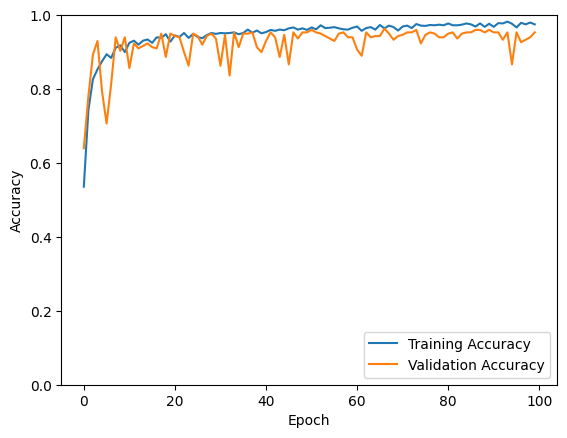

In [61]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## InceptionV3

In [62]:
local_weights_file = '/content/drive/MyDrive/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
     layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_31 (Conv2D)          (None, 74, 74, 32)           864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_25 (Ba  (None, 74, 74, 32)           96        ['conv2d_31[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_21 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [63]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer of vgg output shape: ', last_layer.output_shape)
last_output = last_layer.output


x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(3, activation='softmax')(x)

model_inception = Model(pre_trained_model.input, x)

last layer of vgg output shape:  (None, 7, 7, 768)


In [64]:
model_inception.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])


In [65]:
history = model_inception.fit(X_other,Y_other,epochs=100,validation_data=(X_t_other,Y_test_other))

Epoch 1/100
38/38 [==============================] - 12s 146ms/step - loss: 0.5099 - acc: 0.9033 - val_loss: 0.0944 - val_acc: 0.9800
Epoch 2/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0763 - acc: 0.9742 - val_loss: 0.1866 - val_acc: 0.9667
Epoch 3/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0388 - acc: 0.9875 - val_loss: 0.5371 - val_acc: 0.9300
Epoch 4/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0202 - acc: 0.9958 - val_loss: 0.1060 - val_acc: 0.9800
Epoch 5/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0381 - acc: 0.9900 - val_loss: 0.0934 - val_acc: 0.9800
Epoch 6/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0126 - acc: 0.9942 - val_loss: 0.1465 - val_acc: 0.9767
Epoch 7/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0716 - val_acc: 0.9833
Epoch 8/100
38/38 [==============================] - 2s 46ms/step - loss: 

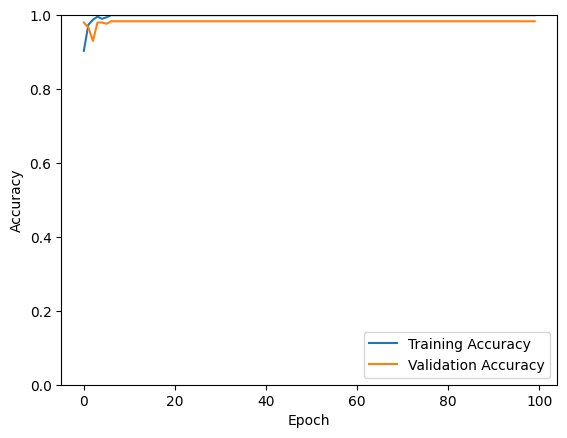

In [66]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Using the saved train and test files

In [ ]:
X_train_other_loaded = pd.read_csv('/content/drive/MyDrive/x_train_other.csv')
X_test_other_loaded = pd.read_csv('/content/drive/MyDrive/x_test_other.csv')
Y_other_loaded = loadtxt('/content/drive/MyDrive/y_train_other_resnet.csv', delimiter=',')
Y_test_other_loaded = loadtxt('/content/drive/MyDrive/y_test_other_resnet.csv', delimiter=',')

## VGG16

In [67]:
file='/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model=VGG16(input_shape = (150, 150, 3),
                        include_top = False,
                        weights =None)

pretrained_model.load_weights(file)

for layer in pretrained_model.layers:
     layer.trainable = False

In [68]:
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(3, activation='softmax')(x)

model_vgg = Model(pretrained_model.input, x)

last layer of vgg : output shape:  (None, 4, 4, 512)


In [69]:
model_vgg.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [70]:
history = model_vgg.fit(X_other,Y_other,epochs=100,validation_data=(X_t_other,Y_test_other))


Epoch 1/100
38/38 [==============================] - 9s 178ms/step - loss: 0.2383 - acc: 0.9142 - val_loss: 0.1666 - val_acc: 0.9367
Epoch 2/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0594 - acc: 0.9817 - val_loss: 0.1084 - val_acc: 0.9633
Epoch 3/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0308 - acc: 0.9925 - val_loss: 0.0584 - val_acc: 0.9867
Epoch 4/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0163 - acc: 0.9967 - val_loss: 0.0811 - val_acc: 0.9733
Epoch 5/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0148 - acc: 0.9967 - val_loss: 0.0627 - val_acc: 0.9800
Epoch 6/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0147 - acc: 0.9967 - val_loss: 0.0617 - val_acc: 0.9833
Epoch 7/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0086 - acc: 0.9975 - val_loss: 0.0586 - val_acc: 0.9867
Epoch 8/100
38/38 [==============================] - 3s 88ms/step - loss: 

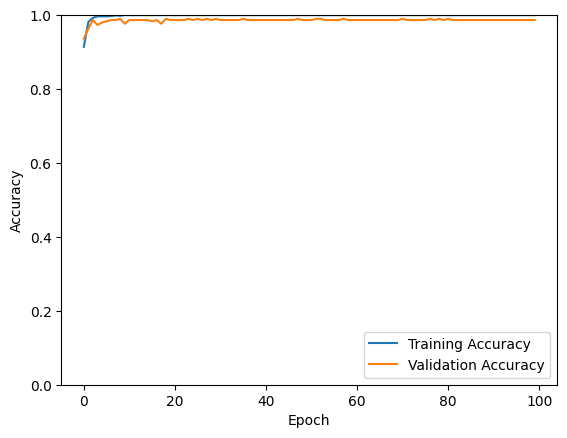

In [71]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Trying the Deep Neural Networks and Transfer Learning for Food Crop Identification in UAV Images
by Robert Chew 1,*ORCID,Jay Rineer 1,Robert Beach 1ORCID,Maggie O’Neil 1,Noel Ujeneza 2,Daniel Lapidus 1,Thomas Miano 1,Meghan Hegarty-Craver 1,Jason Polly 3 andDorota S. Temple 1

## Using VGG16 with Imagenet weights and Adam optimizer

In [74]:
from tensorflow.keras.optimizers import Adam

In [75]:
pretrained_model=VGG16(input_shape = (150, 150, 3),
                        include_top=False,
                                  weights='imagenet')

for layer in pretrained_model.layers:
     layer.trainable = False

pretrained_model.summary()


# Create a new model for feature extraction
feature_extractor = Model(inputs=pretrained_model.input, outputs=pretrained_model.output)

# Build the classification model
model_vgg_imagenet = Sequential()
model_vgg_imagenet.add(feature_extractor)
model_vgg_imagenet.add(Flatten())
model_vgg_imagenet.add(Dense(256, activation='relu'))
model_vgg_imagenet.add(Dropout(0.5))
model_vgg_imagenet.add(Dense(3, activation='softmax'))

# Compile the model
model_vgg_imagenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [76]:
history = model_vgg_imagenet.fit(X_other,Y_other,epochs=100,validation_data=(X_t_other,Y_test_other))


Epoch 1/100
38/38 [==============================] - 5s 105ms/step - loss: 0.3083 - accuracy: 0.9025 - val_loss: 0.1067 - val_accuracy: 0.9733
Epoch 2/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0592 - accuracy: 0.9800 - val_loss: 0.0731 - val_accuracy: 0.9733
Epoch 3/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0339 - accuracy: 0.9867 - val_loss: 0.0818 - val_accuracy: 0.9733
Epoch 4/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0447 - val_accuracy: 0.9867
Epoch 5/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0178 - accuracy: 0.9958 - val_loss: 0.0652 - val_accuracy: 0.9867
Epoch 6/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0108 - accuracy: 0.9975 - val_loss: 0.0661 - val_accuracy: 0.9867
Epoch 7/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0083 - accuracy: 0.9950 - val_loss: 0.0697 - val_accuracy: 0.9867
Epoch

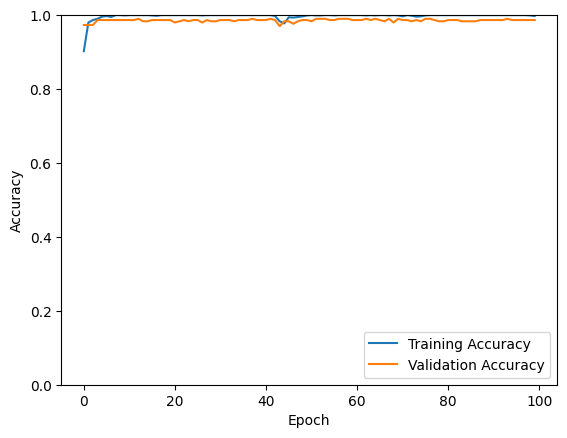

In [78]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## VGG16 on unzoomed dataset

In [83]:

# Load the CSV file into a pandas DataFrame
data_unzoomed = pd.read_csv('/content/drive/MyDrive/training_details_500.csv')


data_unzoomed

,path,label,crop
0,/content/drive/MyDrive/Cotton/aug-DJI_0557.JPG,1,cotton
1,/content/drive/MyDrive/Cotton/aug-DJI_0558.JPG,1,cotton
2,/content/drive/MyDrive/Cotton/aug-DJI_0559.JPG,1,cotton
3,/content/drive/MyDrive/Cotton/aug-DJI_0560.JPG,1,cotton
4,/content/drive/MyDrive/Cotton/aug-DJI_0561.JPG,1,cotton
...,...,...,...
1495,/content/drive/MyDrive/RedGram/DJI_0151.JPG,0,red gram
1496,/content/drive/MyDrive/RedGram/DJI_0149.JPG,0,red gram
1497,/content/drive/MyDrive/RedGram/DJI_0148.JPG,0,red gram
1498,/content/drive/MyDrive/RedGram/DJI_0147.JPG,0,red gram


In [79]:
file='/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model=VGG16(input_shape = (150, 150, 3),
                        include_top = False,
                        weights =None)

pretrained_model.load_weights(file)

for layer in pretrained_model.layers:
     layer.trainable = False

In [80]:
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(3, activation='softmax')(x)

model_vgg = Model(pretrained_model.input, x)

last layer of vgg : output shape:  (None, 4, 4, 512)


In [87]:
def path_to_RGB_other(path :str):
   path=path.replace('/input','/input/agriculture-crop-images/crop_images')
   img = Image.open(path)
   img = img.resize((150, 150))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(150,150,3)

   return img_arr

def path_to_RGB_test_other(path :str):
   img = Image.open(path)
   img = img.resize((150, 150))
   img_arr = np.array(img)
   img_arr = img_arr.reshape(150,150,3)
   return img_arr

In [84]:
X_train_unzoomed, X_test_unzoomed, y_train_unzoomed, y_test_unzoomed = train_test_split(data_unzoomed.drop(columns=['label']), data_unzoomed['label'] , test_size=0.2, random_state=42)

In [88]:
X_train_unzoomed['path']=X_train_unzoomed['path'].apply(path_to_RGB_other)
X_test_unzoomed['path']=X_test_unzoomed['path'].apply(path_to_RGB_test_other)
X_train_unzoomed['path']=X_train_unzoomed['path']/255
X_test_unzoomed['path']=X_test_unzoomed['path']/255

In [93]:
no_of_train_unzoomed = X_train_unzoomed['path'].shape[0]
no_of_test_unzoomed = X_test_unzoomed['path'].shape[0]

In [94]:
X_unzoomed=[]
for x in X_train_unzoomed['path']:
    for j in x:
        for i in j:
            for a in i :
                X_unzoomed.append(a)

In [95]:
X_unzoomed=np.asarray(X_unzoomed).reshape(no_of_train_other,150,150,3)
Y_unzoomed=y_train_unzoomed
Y_unzoomed=to_categorical(Y_unzoomed,num_classes=3)

In [96]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt, loadtxt

In [97]:
savetxt('/content/drive/MyDrive/y_train_unzoomed.csv', Y_unzoomed, delimiter=',')

In [98]:
np.save('/content/drive/MyDrive/x_train_array_unzoomed.csv', X_unzoomed)

In [99]:
type(Y_other)

numpy.ndarray

In [101]:
#similar as done for the training data
X_t_unzoomed=[]
for x in X_test_unzoomed['path']:
    for j in x:
        for i in j:
            for a in i :
                X_t_unzoomed.append(a)

In [102]:
X_t_unzoomed=np.asarray(X_t_unzoomed).reshape(no_of_test_unzoomed,150,150,3)

In [105]:
np.save('/content/drive/MyDrive/x_test_array_unzoomed.csv', X_t_unzoomed)


In [106]:
Y_test_unzoomed=to_categorical(y_test_unzoomed,num_classes=3)
print(Y_test_unzoomed)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [107]:
savetxt('/content/drive/MyDrive/y_test_unzoomed.csv', Y_test_unzoomed, delimiter=',')

In [108]:
file='/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model=VGG16(input_shape = (150, 150, 3),
                        include_top = False,
                        weights =None)

pretrained_model.load_weights(file)

for layer in pretrained_model.layers:
     layer.trainable = False

In [110]:
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(3, activation='softmax')(x)

model_vgg16_unzoomed = Model(pretrained_model.input, x)

last layer of vgg : output shape:  (None, 4, 4, 512)


In [111]:
model_vgg16_unzoomed.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [112]:
history = model_vgg16_unzoomed.fit(X_unzoomed,Y_unzoomed,epochs=100,validation_data=(X_t_unzoomed,Y_test_unzoomed))


Epoch 1/100
38/38 [==============================] - 5s 105ms/step - loss: 0.2828 - acc: 0.8908 - val_loss: 0.0945 - val_acc: 0.9733
Epoch 2/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0579 - acc: 0.9850 - val_loss: 0.0478 - val_acc: 0.9867
Epoch 3/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0261 - acc: 0.9975 - val_loss: 0.0456 - val_acc: 0.9933
Epoch 4/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0154 - acc: 0.9975 - val_loss: 0.0387 - val_acc: 0.9800
Epoch 5/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0099 - acc: 1.0000 - val_loss: 0.0358 - val_acc: 0.9933
Epoch 6/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.0296 - val_acc: 0.9900
Epoch 7/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.0314 - val_acc: 0.9900
Epoch 8/100
38/38 [==============================] - 3s 85ms/step - loss: 0

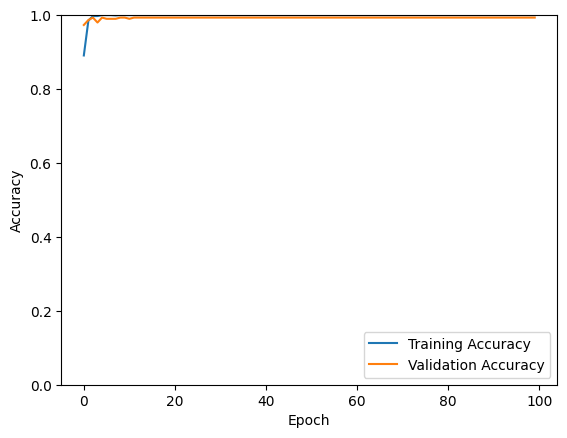

In [113]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()